In [43]:
%load_ext autoreload
%autoreload 2

import io
from PIL import Image
    
import pandas as pd
import pygraphviz as pgv
    
from GraphUtils import PLSPMModel, GraphManipulations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = pd.read_csv('data/soe_data.csv')
soe_cols = [c for c in data.columns if c.startswith('soe')]
image_cols = [c for c in data.columns if c.startswith('IMG')]

factor_cols = ['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']
mdf_cols = ['Meaningful', 'Salient', 'Different']
power_premium_cols = ['Power', 'Premium v2']

data.columns

Index(['id', 'brand', 'IMG01_', 'IMG02_', 'IMG03_', 'IMG04_', 'IMG05_',
       'IMG06_', 'IMG07_', 'IMG08_', 'IMG09_', 'IMG10_', 'IMG11_', 'IMG12_',
       'IMG13_', 'IMG14_', 'IMG15_', 'IMG16_', 'IMG17_', 'IMG18_', 'IMG19_',
       'IMG20_', 'IMG21_', 'IMG22_', 'IMG23_', 'IMG24_', 'IMG25_', 'IMG26_',
       '@input.Affinity', '@input.MeetNeeds', '@input.Dynamic',
       '@input.Unique', 'Meaningful', 'Salient', 'Different', 'M_F_I', 'D_F_I',
       'S_F_I', 'Power', 'Premium v2', 'soe.IMG01_', 'soe.IMG02_',
       'soe.IMG03_', 'soe.IMG04_', 'soe.IMG05_', 'soe.IMG06_', 'soe.IMG07_',
       'soe.IMG08_', 'soe.IMG09_', 'soe.IMG10_', 'soe.IMG11_', 'soe.IMG12_',
       'soe.IMG13_', 'soe.IMG14_', 'soe.IMG15_', 'soe.IMG16_', 'soe.IMG17_',
       'soe.IMG18_', 'soe.IMG19_', 'soe.IMG20_', 'soe.IMG21_', 'soe.IMG22_',
       'soe.IMG23_', 'soe.IMG24_', 'soe.IMG25_', 'soe.IMG26_'],
      dtype='object')

In [5]:
edges = [
    ('@input.MeetNeeds', 'Meaningful'),
    ('@input.MeetNeeds', 'Different'),
    ('@input.MeetNeeds', 'Salient'),
    
    ('@input.Affinity', 'Meaningful'),
    ('@input.Affinity', 'Different'),
    ('@input.Affinity', 'Salient'),

    ('@input.Dynamic', 'Meaningful'),
    ('@input.Dynamic', 'Different'),
    ('@input.Dynamic', 'Salient'),

    ('@input.Unique', 'Meaningful'),
    ('@input.Unique', 'Different'),
    ('@input.Unique', 'Salient'),

    ('Meaningful', 'Power'),
    ('Different', 'Power'),
    ('Salient', 'Power'),
]

In [6]:
mdl = PLSPMModel(edges)
#mdl.ConfgFromEdges(edges)
mdl.Fit(data)

In [7]:
coef = mdl.GetPathCoefs()
mdl.GetEdgeCoef(('Meaningful', 'Power'))

0.6885866297716134

In [39]:
def Plot(g):
    stream = io.BytesIO()
    g.draw(stream, format='png', prog='dot')
    return Image.open(stream)

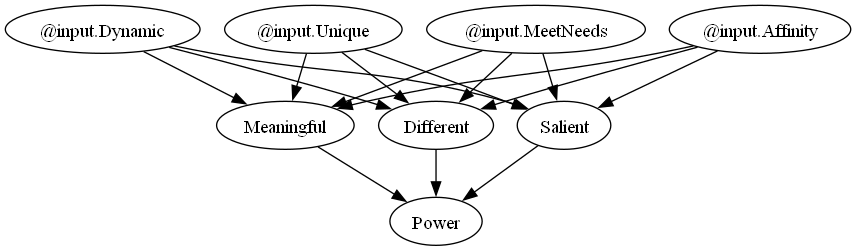

In [48]:
G = GraphManipulations(edges)
G.Edges()
G.Plot()

In [49]:
G.graph.add_subgraph(['Power', 'Salient'], name='One')

<AGraph b'One' <Swig Object of type 'Agraph_t *' at 0x0000027C186549F0>>

In [50]:
G.graph.subgraphs()[0]

<AGraph b'One' <Swig Object of type 'Agraph_t *' at 0x0000027C19642DF0>>

In [51]:
G.graph.nodes()

['@input.MeetNeeds',
 'Meaningful',
 'Different',
 'Salient',
 '@input.Affinity',
 '@input.Dynamic',
 '@input.Unique',
 'Power']

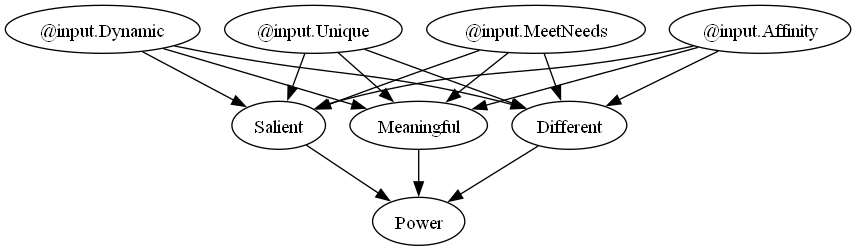

In [52]:
G.Plot()

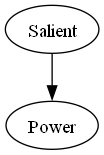

In [53]:
Plot(G.graph.subgraphs()[0])

In [54]:
test = pd.read_excel('data/data.xlsx', sheet_name='model_spec')

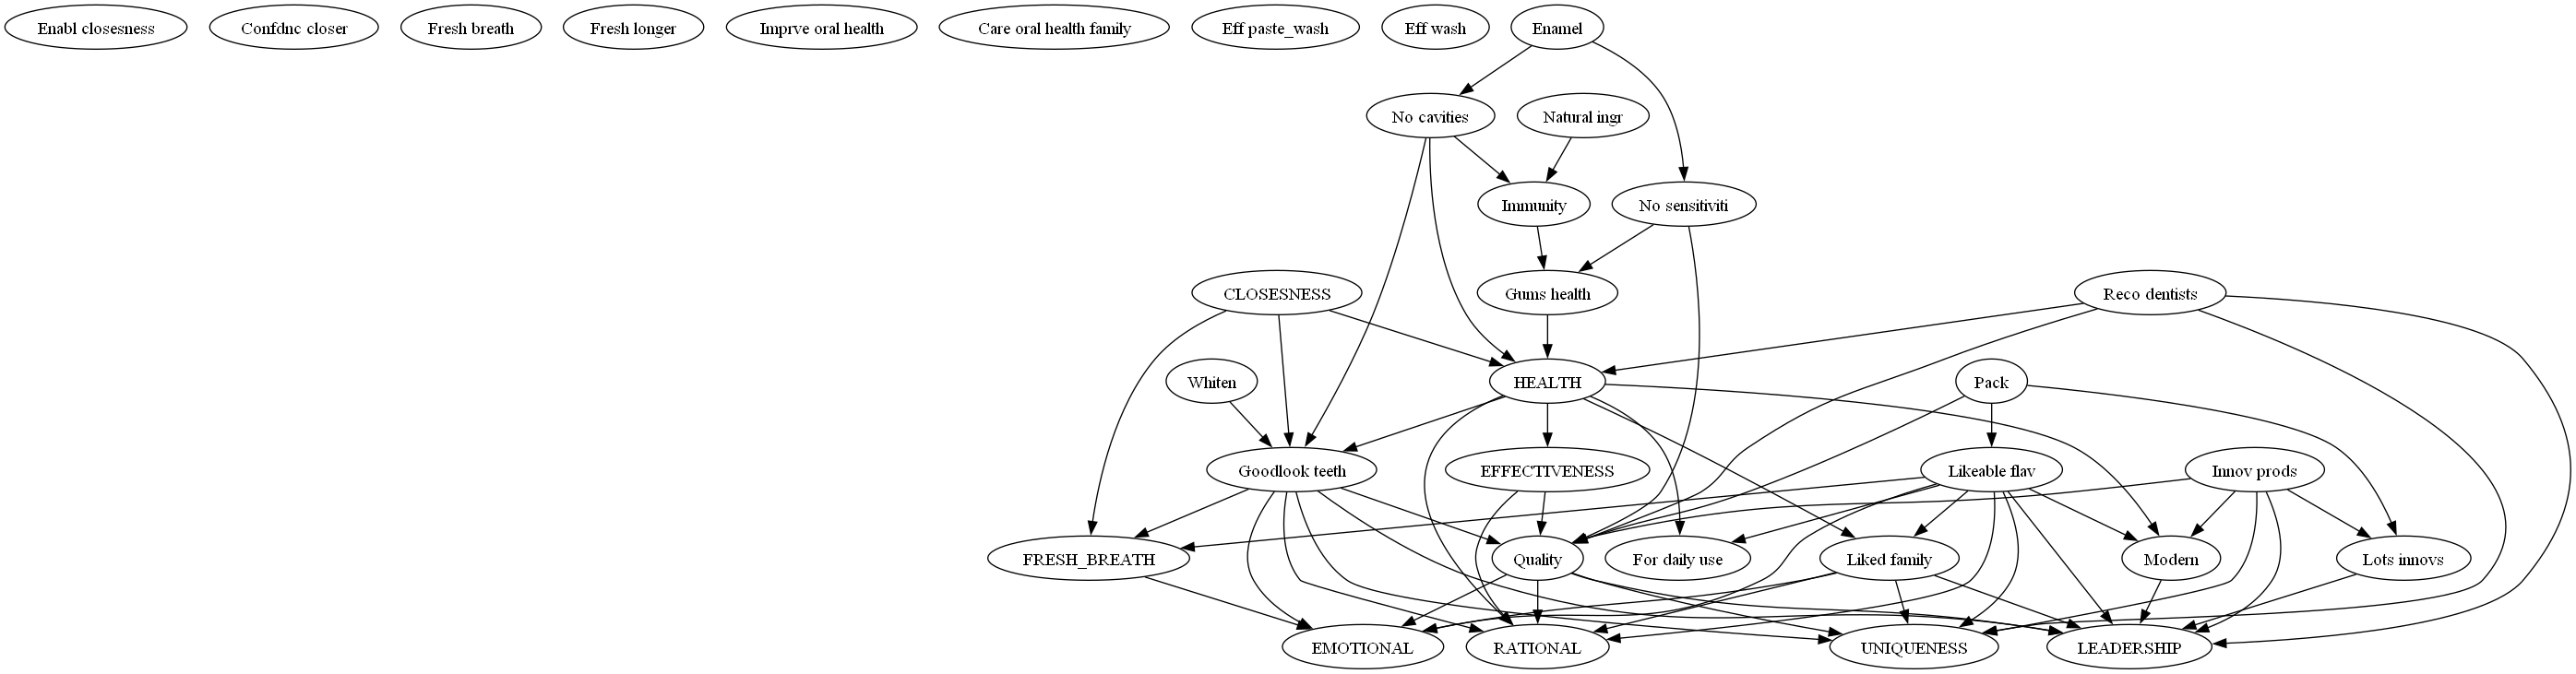

In [85]:
G = GraphManipulations.FromSpec(test)
Plot(G)

In [86]:
G.subgraphs()

[<AGraph b'CLOSESNESS' <Swig Object of type 'Agraph_t *' at 0x0000027C19470630>>,
 <AGraph b'FRESH_BREATH' <Swig Object of type 'Agraph_t *' at 0x0000027C1DB040C0>>,
 <AGraph b'HEALTH' <Swig Object of type 'Agraph_t *' at 0x0000027C1F5CCC30>>,
 <AGraph b'EFFECTIVENESS' <Swig Object of type 'Agraph_t *' at 0x0000027C1F5CD6E0>>]

In [93]:
#G.subgraphs()[0].nodes()
G.subgraphs()[0].attr['label']

AttributeError: 'AGraph' object has no attribute 'attr'

In [88]:
G.nodes()

['Pack',
 'Likeable flav',
 'Lots innovs',
 'Quality',
 'Whiten',
 'Goodlook teeth',
 'FRESH_BREATH',
 'EMOTIONAL',
 'CLOSESNESS',
 'For daily use',
 'HEALTH',
 'Reco dentists',
 'LEADERSHIP',
 'UNIQUENESS',
 'Innov prods',
 'Modern',
 'Natural ingr',
 'Immunity',
 'EFFECTIVENESS',
 'RATIONAL',
 'No sensitiviti',
 'Enamel',
 'No cavities',
 'Gums health',
 'Liked family',
 'Enabl closesness',
 'Confdnc closer',
 'Fresh breath',
 'Fresh longer',
 'Imprve oral health',
 'Care oral health family',
 'Eff paste_wash',
 'Eff wash']